In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [ ]:
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC 1-$\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']

In [10]:
f = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/LowLevelAnaFiles/MCBNBCos/lowlevel_ratiocut_ana.root', treename='low_level_tree')
df = pd.DataFrame(f)

#df.info()

temp = df.query('nshrs > 1')
print temp.shape, df.shape

(1117, 23) (5643, 23)


In [11]:
f2 = rn.root2array('/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/cutjustify_pi0.root', treename='pi0_selection')
df2 = pd.DataFrame(f2)

#df2.info()
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC 1-$\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']

In [130]:
cos_v = df2.query('bkgd_id == 1')
cc1pi0_v = df2.query('bkgd_id == 2')
cc0pi0_v = df2.query('bkgd_id == 3')
nc1pi0_v = df2.query('bkgd_id == 4')
nc0pi0_v = df2.query('bkgd_id == 5')
oth_v = df2.query('bkgd_id == 6')

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [131]:
stage = 'pi0'
print df2.shape

(1802, 10)


In [132]:
def makePlots(var,var_min,var_max,nbins=20,xlabel=''):


    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,stacked=True,\
         range=(var_min,var_max))
    #plt.hist(df2[var].values,bins=nbins,histtype='step',lw=3,range=(var_min,var_max))
    plt.grid(True)
    #handles,labels = ax.get_legend_handles_labels()
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/CutJustify_%s%s'%(stage,var))
    

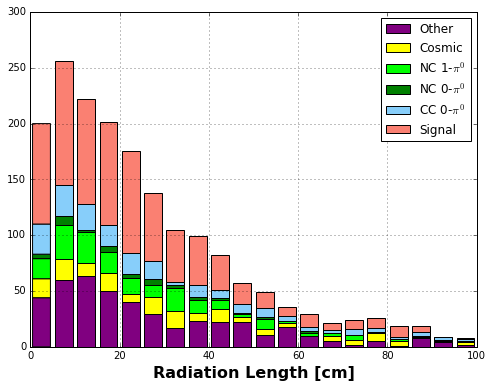

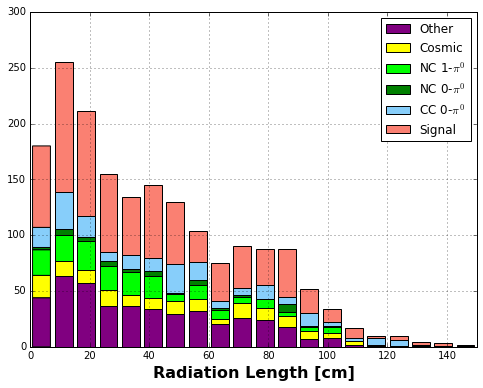

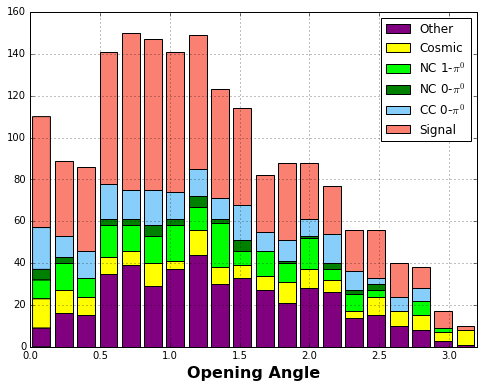

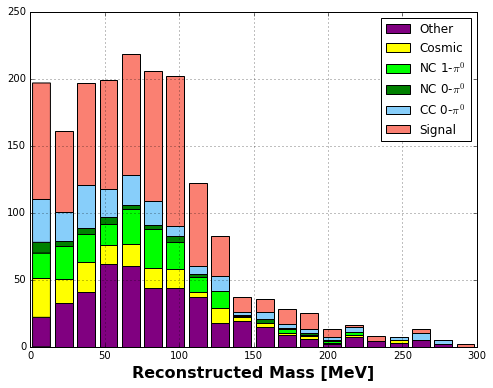

In [134]:
# Shower Plots
makePlots('_pi0_high_radL',0,100,xlabel='Radiation Length [cm]')
makePlots('_pi0_low_radL',0,150,xlabel='Radiation Length [cm]')
makePlots('_pi0_oangle',0,3.2,xlabel='Opening Angle')
makePlots('_pi0_mass',0,300,xlabel='Reconstructed Mass [MeV]')


In [135]:
def make2DPlots(var1,var2,xmin,xmax,ymin,ymax,bins=50,xlabel='',ylabel=''):

    stage = 'pi0'
    
    for i in xrange(1,7):
        df_temp = df2.query('bkgd_id == %i' %i)
    
        H, xedges, yedges = np.histogram2d(df_temp[var2].values,df_temp[var1].values,bins=bins,\
                                        range=((ymin,ymax),(xmin,xmax)))
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

        fig = plt.figure(figsize=(8,6))
        #plt.plot((0,0.35),(62,62),color='fuchsia',lw=4)
        #plt.plot((0.35,0.35),(0,62),color='fuchsia',lw=4)
        plt.pcolormesh(yedges,xedges,Hmasked)
        plt.grid(True)
        plt.colorbar()
        
        plt.xlabel(xlabel,fontsize=16,weight='bold')
        plt.ylabel(ylabel,fontsize=16,weight='bold')
        plt.title('%s'%name_v[i],fontsize=16,weight='bold')
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        plt.savefig('Plots/CutJustify_%s%s%s_%s'%(stage,var1,var2,label_v[i]))


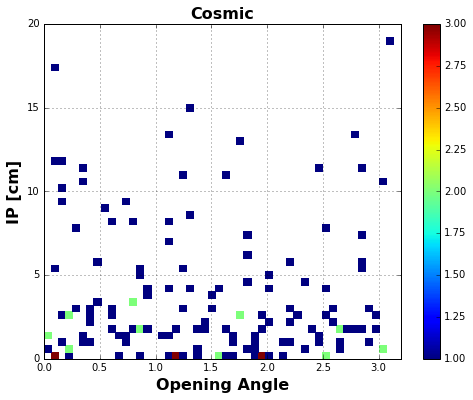

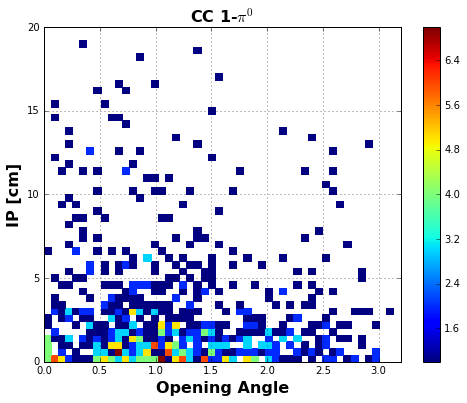

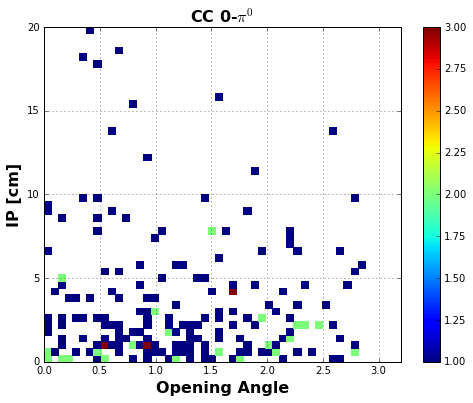

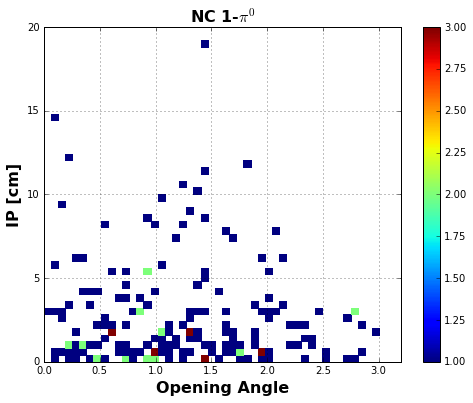

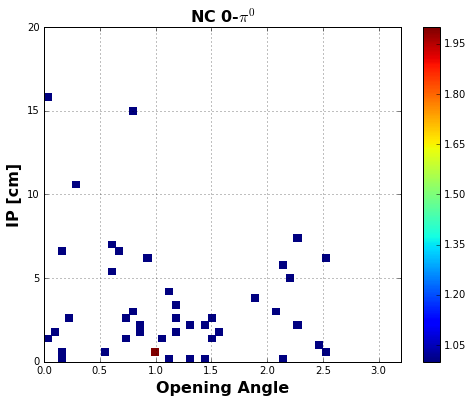

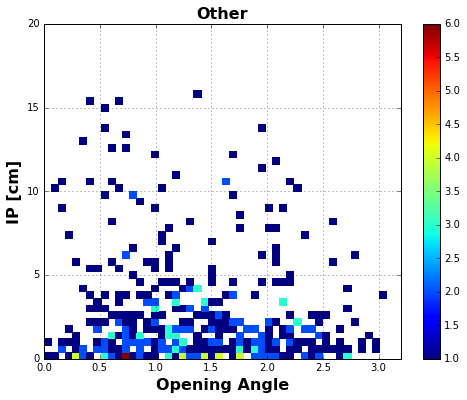

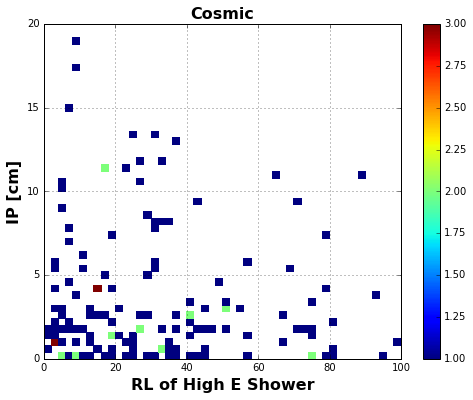

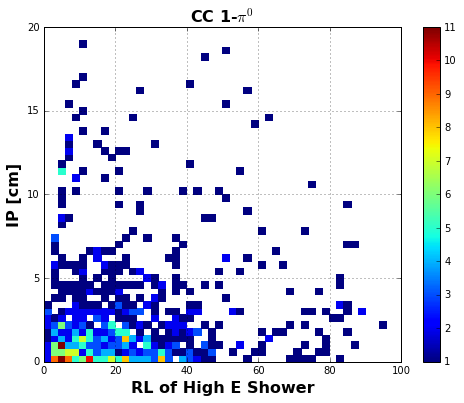

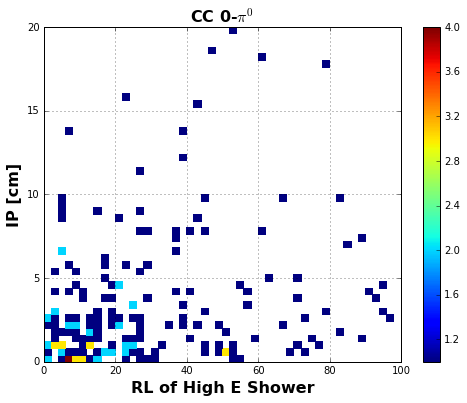

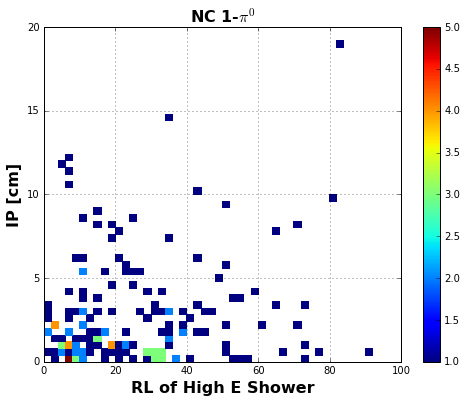

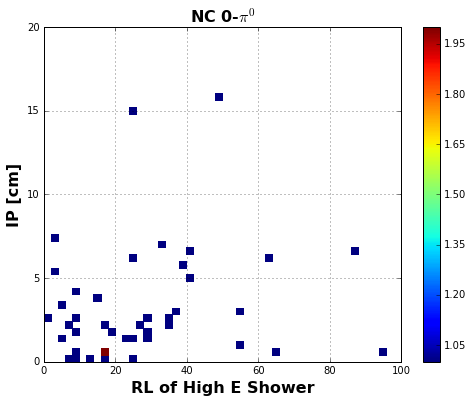

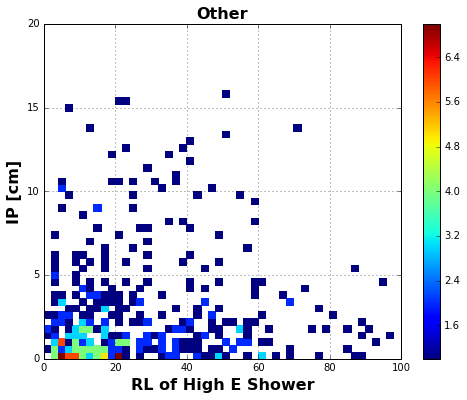

In [136]:
make2DPlots('_pi0_oangle','_pi0_IP',0,3.2,0,20,xlabel='Opening Angle',ylabel='IP [cm]')
make2DPlots('_pi0_high_radL','_pi0_IP',0,100,0,20,xlabel='RL of High E Shower',ylabel='IP [cm]')


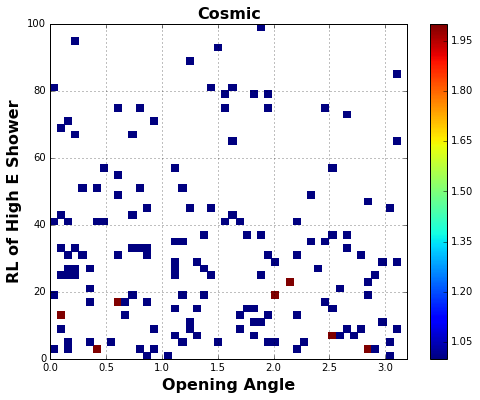

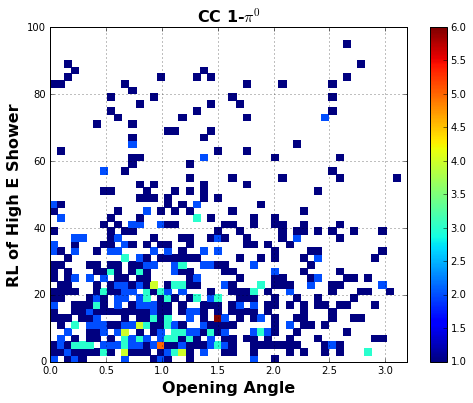

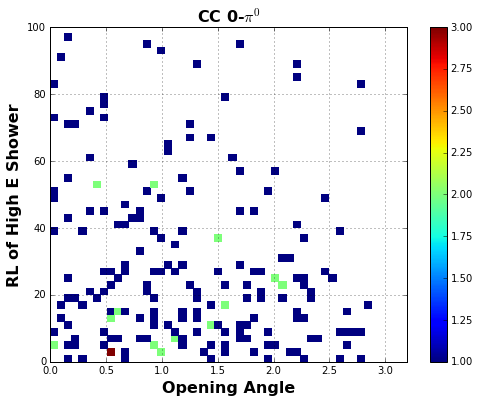

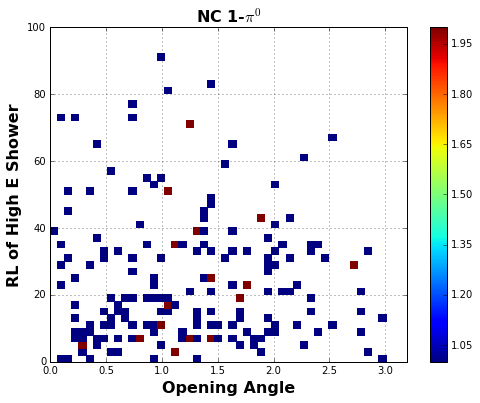

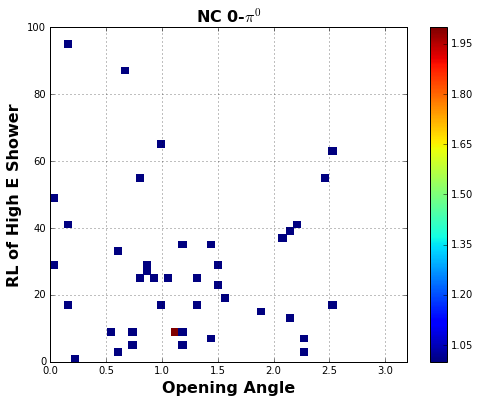

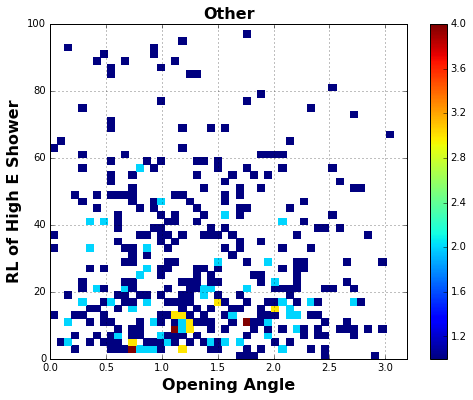

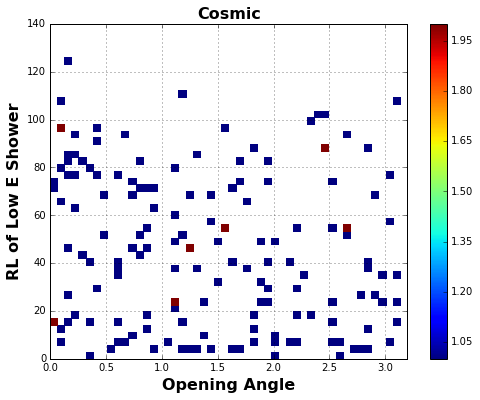

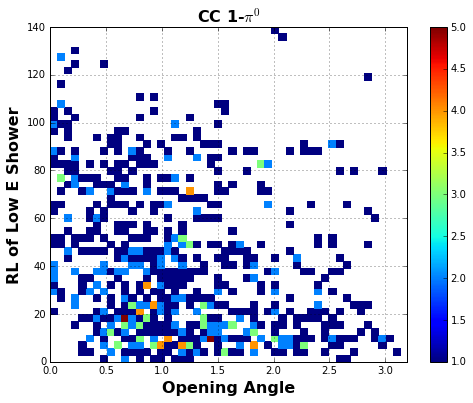

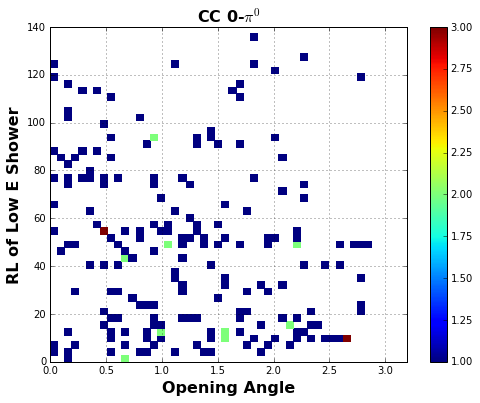

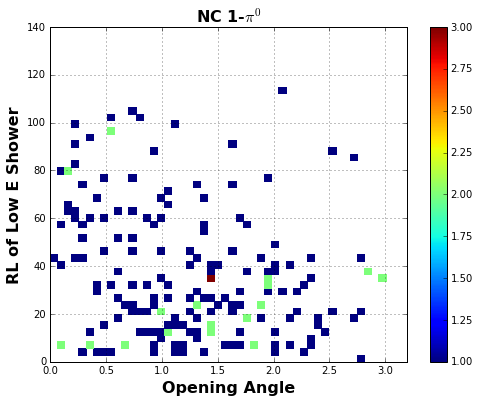

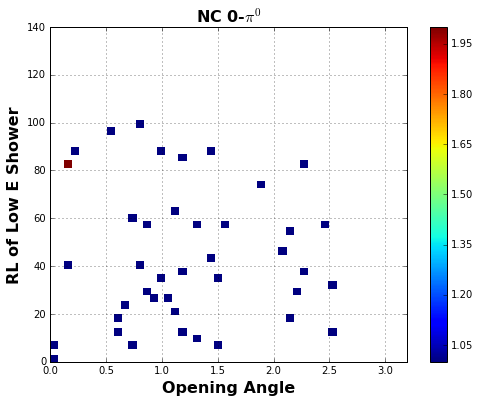

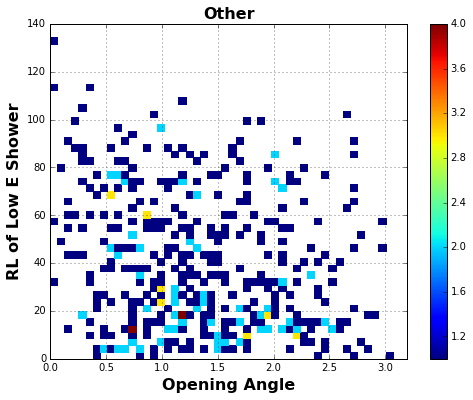

In [137]:
make2DPlots('_pi0_oangle','_pi0_high_radL',0,3.2,0,100,xlabel='Opening Angle',ylabel='RL of High E Shower')
make2DPlots('_pi0_oangle','_pi0_low_radL',0,3.2,0,140,xlabel='Opening Angle',ylabel='RL of Low E Shower')


In [155]:
def makeNonStackedPlots(var,var_min,var_max,nbins=40,xlabel=''):
    
    lw = 2

    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist(oth_v[var].values,bins=nbins,label='Other',color=colors_tst[0],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(cos_v[var].values,bins=nbins,label='Cosmic',color=colors_tst[1],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(nc1pi0_v[var].values,bins=nbins,label='NC1pi0',color=colors_tst[2],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(nc0pi0_v[var].values,bins=nbins,label='NC0pi0',color=colors_tst[3],histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(cc0pi0_v[var].values,bins=nbins,label='CC0pi0',color='blue',histtype='step',lw=lw,range=(var_min,var_max))
    ax.hist(cc1pi0_v[var].values,bins=nbins,label='CC1pi0',color=colors_tst[5],histtype='step',lw=lw,range=(var_min,var_max))
    plt.grid(True)
    plt.xlim(var_min,var_max)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend(loc=0) #handles=handles[::-1],fontsize=12)
    plt.ylim(0)
    plt.savefig('Plots/CutJustify_%s_nonstacked%s'%(stage,var))
    

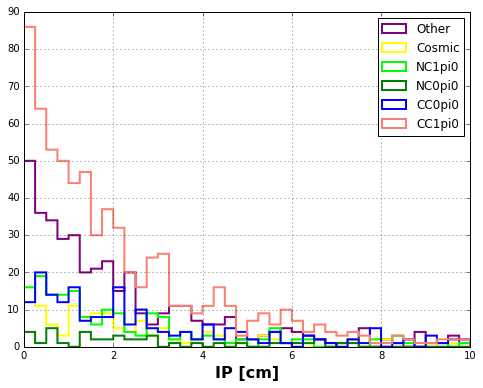

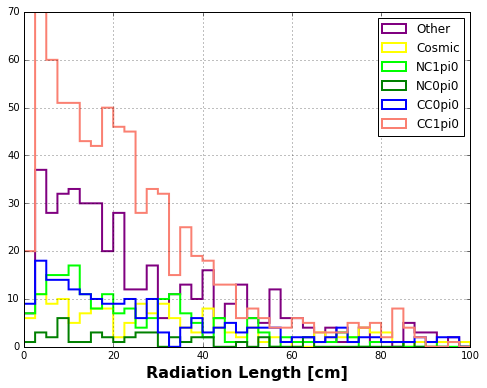

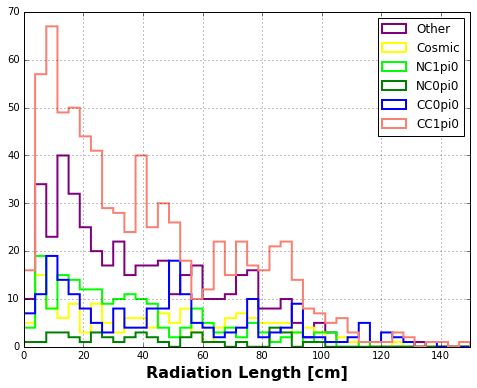

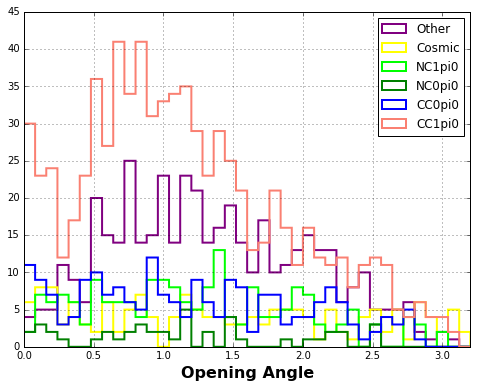

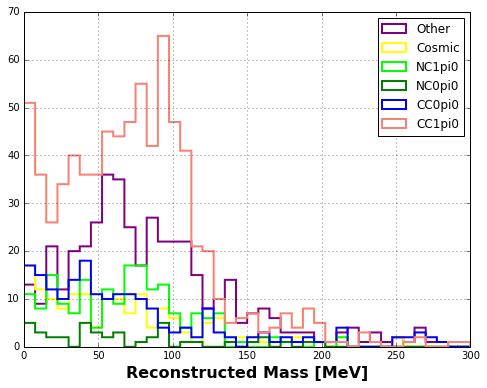

In [158]:
# Shower Plots
makeNonStackedPlots('_pi0_IP',0,10,xlabel='IP [cm]')
makeNonStackedPlots('_pi0_high_radL',0,100,xlabel='Radiation Length [cm]')
makeNonStackedPlots('_pi0_low_radL',0,150,xlabel='Radiation Length [cm]')
makeNonStackedPlots('_pi0_oangle',0,3.2,xlabel='Opening Angle')
makeNonStackedPlots('_pi0_mass',0,300,xlabel='Reconstructed Mass [MeV]')
